|Name:|Tufan Kundu|
|-|-|
|Registration no:|24MDT0184|
|Course Name:|Deep Learning Lab|
|Course Code:|PMDS603P|
|Experiment:|12|
|Date:|16 October,2025|

## Question 1: Fit a Bi-directional LSTM model to predict the next day gold price given the gold price of 10 consecutive days. Use the dataset provided in Experiment 9. Now compare your results with the normal RNN model you have already fitted.

### importing the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional, Dense, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')


In [9]:
np.random.seed(42)

### Loading the dataset

In [10]:
df = pd.read_csv("/kaggle/input/gold-price/gold_price.csv")
df

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93
...,...,...
2306,2025-03,2983.25
2307,2025-04,3217.64
2308,2025-05,3309.49
2309,2025-06,3352.66


In [11]:
data = df['Price'].values.reshape(-1,1)
data

array([[  18.93],
       [  18.93],
       [  18.93],
       ...,
       [3309.49],
       [3352.66],
       [3340.15]])

### Scaling the data

In [12]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

### Data Preparation

In [13]:
train_size = int(len(data_scaled)*0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

In [14]:
def create_sequences(data, input_length = 10, output_length = 10):
    x,y = [],[]
    for i in range(len(data)-input_length-output_length+1):
        x.append(data[i:i+input_length])
        y.append(data[i+input_length:i+input_length+output_length])
    return np.array(x), np.array(y)

input_length = 10
output_length = 10
x_train_full, y_train_full = create_sequences(train_data, input_length, output_length)
x_test,y_test = create_sequences(test_data, input_length, output_length)

In [15]:
val_fraction = 0.2
val_size = int(len(x_train_full)*val_fraction)

x_val = x_train_full[-val_size:]
y_val = y_train_full[-val_size:]

x_train = x_train_full[:-val_size]
y_train = y_train_full[:-val_size]

### Building and evaluating by RNN model

In [16]:
model = Sequential()
model.add(SimpleRNN(64, activation = 'tanh', return_sequences=True, input_shape = (input_length,1)))
model.add(TimeDistributed(Dense(1)))

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True, verbose=1)

history = model.fit(
    x_train,y_train,
    epochs = 500,
    batch_size = 16,
    validation_data = (x_val,y_val),
    verbose = 1,
    callbacks=[early_stop]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 10, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 10, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500


I0000 00:00:1761295987.279077     112 service.cc:148] XLA service 0x29e3e640 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1761295987.280096     112 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1761295987.280115     112 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1761295987.558660     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


63/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9922e-05

I0000 00:00:1761295988.718250     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 2.3412e-05 - val_loss: 6.3514e-04
Epoch 2/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.8970e-07 - val_loss: 5.2329e-04
Epoch 3/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1163e-07 - val_loss: 4.8959e-04
Epoch 4/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4307e-07 - val_loss: 4.7340e-04
Epoch 5/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4871e-07 - val_loss: 4.5697e-04
Epoch 6/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5850e-07 - val_loss: 4.4838e-04
Epoch 7/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2504e-07 - val_loss: 4.4195e-04
Epoch 8/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3084e-07 - val_loss: 4.3351e-04
Epoch 9/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5115e-07 - val_loss: 4.2935e-04
Epoch 10/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5966e-07 - val_loss: 4.2587e-04
Epoch 11/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4021e-07 - val_los

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
RMSE: 186.7050094694
R² Score: 0.9112067557553054


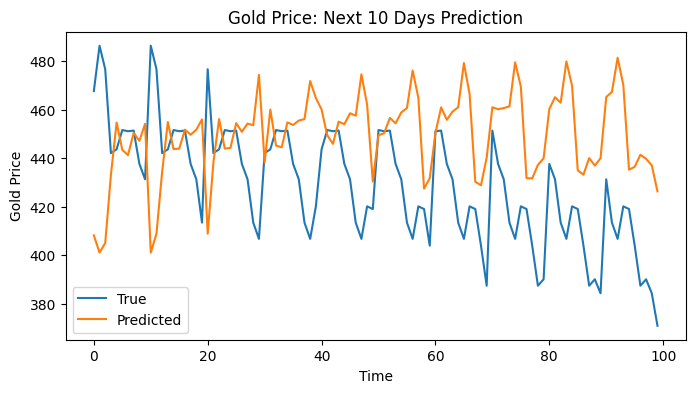

In [17]:
# Prediction
y_pred = model.predict(x_test)
y_pred_orig = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
r2 = r2_score(y_test_orig, y_pred_orig)

print("RMSE:", rmse)
print("R² Score:", r2)

# Plot results
plt.figure(figsize=(8,4))
plt.plot(y_test_orig[:100], label='True')
plt.plot(y_pred_orig[:100], label='Predicted')
plt.title("Gold Price: Next 10 Days Prediction")
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

### Using BILSTM model

In [18]:
bi_lstm_model = Sequential()
bi_lstm_model.add(Bidirectional(
    LSTM(64,activation='tanh', return_sequences=True),
    input_shape = (input_length,1)
))
bi_lstm_model.add(TimeDistributed(Dense(1)))

bi_lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
bi_lstm_model.summary()

history_bi = bi_lstm_model.fit(
    x_train,y_train,
    epochs = 500,
    batch_size = 16,
    validation_data = (x_val,y_val),
    verbose = 1,
    callbacks = [early_stop]
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 10, 128)        │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 10, 1)          │           129 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,921 (132.50 KB)

 Trainable params: 33,921 (132.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 1.0710e-05 - val_loss: 0.0015
Epoch 2/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0688e-06 - val_loss: 5.2557e-04
Epoch 3/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.9227e-07 - val_loss: 3.9701e-04
Epoch 4/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.0633e-07 - val_loss: 3.9914e-04
Epoch 5/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5224e-07 - val_loss: 3.9983e-04
Epoch 6/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4891e-07 - val_loss: 3.9675e-04
Epoch 7/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5273e-07 - val_loss: 3.9638e-04
Epoch 8/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8116e-07 - val_loss: 3.9759e-04
Epoch 9/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7967e-07 - val_loss: 3.9861e-04
Epoch 10/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.8959e-07 - val_loss: 3.9980e-04
Epoch 11/500
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5154e-07 -

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Bi-LSTM Results
RMSE: 372.3040884351593
R² Score: 0.6469277430632671

Comparison
Simple RNN -> RMSE: 186.7050, R²: 0.9112
Bi-LSTM     -> RMSE: 372.3041, R²: 0.6469


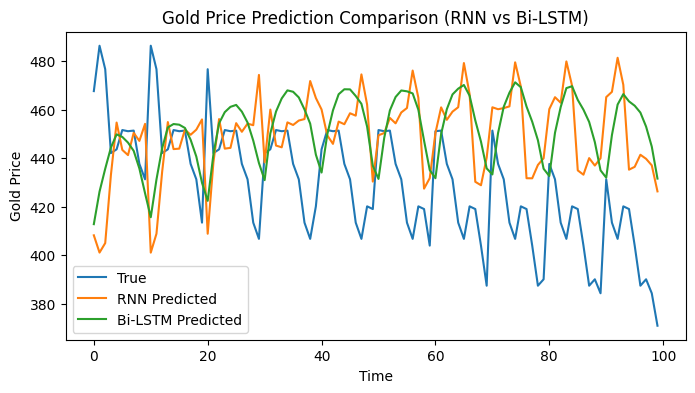

In [19]:
# Prediction
y_pred_bi = bi_lstm_model.predict(x_test)
y_pred_bi_orig = scaler.inverse_transform(y_pred_bi.reshape(-1,1))
y_test_orig = scaler.inverse_transform(y_test.reshape(-1,1))

# Evaluation
rmse_bi = np.sqrt(mean_squared_error(y_test_orig, y_pred_bi_orig))
r2_bi = r2_score(y_test_orig, y_pred_bi_orig)

print("\nBi-LSTM Results")
print("RMSE:", rmse_bi)
print("R² Score:", r2_bi)

# Compare with Simple RNN
print("\nComparison")
print(f"Simple RNN -> RMSE: {rmse:.4f}, R²: {r2:.4f}")
print(f"Bi-LSTM     -> RMSE: {rmse_bi:.4f}, R²: {r2_bi:.4f}")

# Plot comparison
plt.figure(figsize=(8,4))
plt.plot(y_test_orig[:100], label='True')
plt.plot(y_pred_orig[:100], label='RNN Predicted')
plt.plot(y_pred_bi_orig[:100], label='Bi-LSTM Predicted')
plt.title("Gold Price Prediction Comparison (RNN vs Bi-LSTM)")
plt.xlabel("Time")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

## Question 2: Further fit a Bi-directional GRU model for the same problem and verify the results

In [20]:
from tensorflow.keras.layers import GRU, Bidirectional, Dense

model_bi_gru = Sequential([
    Bidirectional(GRU(128, activation='tanh', return_sequences=True), input_shape=(input_length, 1)),
    GRU(64, activation='tanh', return_sequences=True),
    TimeDistributed(Dense(1))
])

model_bi_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_bi_gru.summary()

history_bi_gru = model_bi_gru.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=300,
    batch_size=32,
    verbose=1,
    callbacks = [early_stop]
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 10, 256)        │       100,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 64)         │        61,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 10, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,497 (634.75 KB)

 Trainable params: 162,497 (634.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.1960e-04 - mae: 0.0105 - val_loss: 0.0032 - val_mae: 0.0352
Epoch 2/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2220e-06 - mae: 0.0013 - val_loss: 0.0027 - val_mae: 0.0320
Epoch 3/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1868e-06 - mae: 0.0011 - val_loss: 0.0021 - val_mae: 0.0277
Epoch 4/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.4954e-06 - mae: 9.0845e-04 - val_loss: 0.0015 - val_mae: 0.0223
Epoch 5/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0564e-06 - mae: 7.8649e-04 - val_loss: 9.9463e-04 - val_mae: 0.0172
Epoch 6/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.7561e-07 - mae: 5.5285e-04 - val_loss: 7.0374e-04 - val_mae: 0.0132
Epoch 7/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8566e-07 - mae: 4.1654e-04 - val_loss: 5.7977e-04 - val_mae: 0.0117
Epoch 8/300
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4982e-07 - mae: 2.8545e-04 - val_loss: 5.4596e-04 - val_mae: 0.

In [21]:
y_pred = model_bi_gru.predict(x_test)
y_test_flat = y_test.reshape(-1, 1)
y_pred_flat = y_pred.reshape(-1, 1)

y_test_inv = scaler.inverse_transform(y_test_flat)
y_pred_inv = scaler.inverse_transform(y_pred_flat)

mse_inv = mean_squared_error(y_test_inv, y_pred_inv)
r2_inv = r2_score(y_test_inv, y_pred_inv)

print(f"Results -> MSE: {mse_inv:.4f}, R²: {r2_inv:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Results -> MSE: 29558.9640, R²: 0.9247


## Questions 3: Next, we will try to attempt the sentence completion task mentioned in lab experiment 11. Think how you can create a simple model with an RNN to predict the next word once you give a sentence to the model. Try to create one such model that can do this task. Use the same IMDb dataset for the task. (Hint: Try to first prepare the sequences for training just like we did in gold price prediction, Sequences in which we have say 10 words as inputs and the next word as output. And we can plan, like, in our model, the final layer with a vocabulary size number of neurons. So that you can run with a softmax activation function in the final layer.

In [22]:
import numpy as np 
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

In [23]:
vocab_size = 5000
sequence_length = 10

(x_train,_),(_,_) = imdb.load_data(num_words = vocab_size)

all_words = [word for review in x_train for word in review]

sequences = []
next_words = []

for i in range(len(all_words) - sequence_length):
    seq = all_words[i:i+sequence_length]
    next_word = all_words[i+sequence_length]
    sequences.append(seq)
    next_words.append(next_word)

sequences = np.array(sequences)
next_words = to_categorical(next_words, num_classes = vocab_size)

print("Input shape:", sequences.shape)
print("Output shape:", next_words.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Input shape: (5967831, 10)
Output shape: (5967831, 5000)


In [24]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_shape=(sequence_length,)))
model.add(SimpleRNN(128))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        22,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5000)           │       645,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 917,912 (3.50 MB)

 Trainable params: 917,912 (3.50 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model.fit(sequences[:50000], next_words[:50000], epochs=300, batch_size=128, callbacks = [es], verbose = 1)


Epoch 1/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7552 - loss: 1.1056
Epoch 2/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7543 - loss: 1.0969
Epoch 3/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7623 - loss: 1.0668
Epoch 4/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7680 - loss: 1.0392
Epoch 5/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7739 - loss: 1.0230
Epoch 6/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7798 - loss: 1.0004
Epoch 7/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7810 - loss: 0.9762
Epoch 8/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.9520
Epoch 9/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7933 - loss: 0.9319
Epoch 10/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7936 - loss: 0.9202
Epoch 11/300
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7964 - loss: 0.9118
Epoch 12/300
391/391 ━━━━━━━━━━━━━━━━━━━━

In [30]:
word_index = imdb.get_word_index()

index_word = {index + 3: word for word, index in word_index.items() if index+3 < vocab_size}
index_word[0] = '<PAD>'
index_word[1] = '<START>'
index_word[2] = '<UNK>'

In [31]:
def predict_next_word(model, seed_seq, index_word, sequence_length=10):
    
    seq_input = pad_sequences([seed_seq], maxlen=sequence_length)
    
    pred_probs = model.predict(seq_input, verbose=0)[0]
    
    next_word_index = np.argmax(pred_probs)
    
    next_word = index_word.get(next_word_index, '<UNK>')
    
    return next_word

In [32]:
num_samples = 5  # number of sequences to test
seed_sequences = [all_words[i:i+sequence_length] for i in range(num_samples)]

# Convert seed sequences to actual words for display
seed_words_list = [[index_word.get(idx, '<UNK>') for idx in seq] for seq in seed_sequences]


predicted_next_words = []

for seq in seed_sequences:
    next_word = predict_next_word(model, seq, index_word, sequence_length=sequence_length)
    predicted_next_words.append(next_word)


for i in range(num_samples):
    print(f"Seed sequence {i+1}: {' '.join(seed_words_list[i])}")
    print(f"Predicted next word: {predicted_next_words[i]}")
    print("-" * 50)


Seed sequence 1: <START> this film was just brilliant casting location scenery story
Predicted next word: direction
--------------------------------------------------
Seed sequence 2: this film was just brilliant casting location scenery story direction
Predicted next word: everyone's
--------------------------------------------------
Seed sequence 3: film was just brilliant casting location scenery story direction everyone's
Predicted next word: really
--------------------------------------------------
Seed sequence 4: was just brilliant casting location scenery story direction everyone's really
Predicted next word: suited
--------------------------------------------------
Seed sequence 5: just brilliant casting location scenery story direction everyone's really suited
Predicted next word: the
--------------------------------------------------
